# Рынок заведений общественного питания Москвы

# Описание проекта

Решено открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Необходимо подготовить исследование рынка для инвесторов, пользуясь открытыми данными о заведениях общественного питания в Москве.

# Описание данных

Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству." data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству.</a></span></li><li><span><a href="#Исследование-соотношения-сетевых-и-несетевых-заведений-по-количеству." data-toc-modified-id="Исследование-соотношения-сетевых-и-несетевых-заведений-по-количеству.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование соотношения сетевых и несетевых заведений по количеству.</a></span></li><li><span><a href="#Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение?" data-toc-modified-id="Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Для какого вида объекта общественного питания характерно сетевое распространение?</a></span></li><li><span><a href="#Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест?" data-toc-modified-id="Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест-для-каждого-вида-объекта-общественного-питания." data-toc-modified-id="Среднее-количество-посадочных-мест-для-каждого-вида-объекта-общественного-питания.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Среднее количество посадочных мест для каждого вида объекта общественного питания.</a></span></li><li><span><a href="#Выделение-в-отдельный-столбец-информации-об-улице-из-столбца-address-." data-toc-modified-id="Выделение-в-отдельный-столбец-информации-об-улице-из-столбца-address-.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выделение в отдельный столбец информации об улице из столбца address .</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания-(районы)." data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-(районы).-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания (районы).</a></span></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания-(районы)." data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-(районы).-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания (районы).</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания." data-toc-modified-id="Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания.-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

## Загрузка и предобработка данных

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

from IPython.display import display
from scipy import stats as st

In [2]:
sns.set_palette('Spectral')

In [3]:
data = pd.read_csv('/datasets/rest_data.csv')
display(data)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
data.duplicated().sum()

0

## Анализ данных

### Соотношение видов объектов общественного питания по количеству.

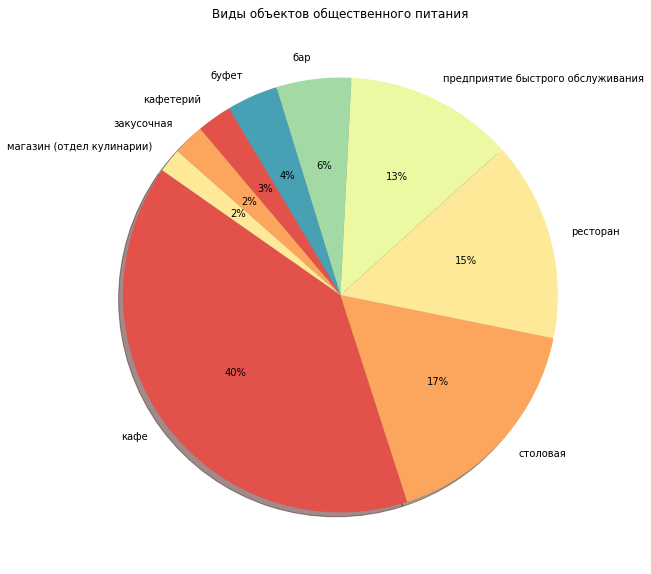

In [6]:
object_types = data['object_type'].value_counts().rename_axis('object_type').reset_index(name='count')

plt.figure(figsize=(15, 10))
plt.pie(object_types['count'], labels=object_types['object_type'],autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Виды объектов общественного питания')
plt.show()

In [7]:
object_types

,object_type,count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Самыми популярными заведениями в Москве являются кафе (40%), столовые (17%), рестораны (15%), заведения быстрого обслуживания (13%).

### Исследование соотношения сетевых и несетевых заведений по количеству.

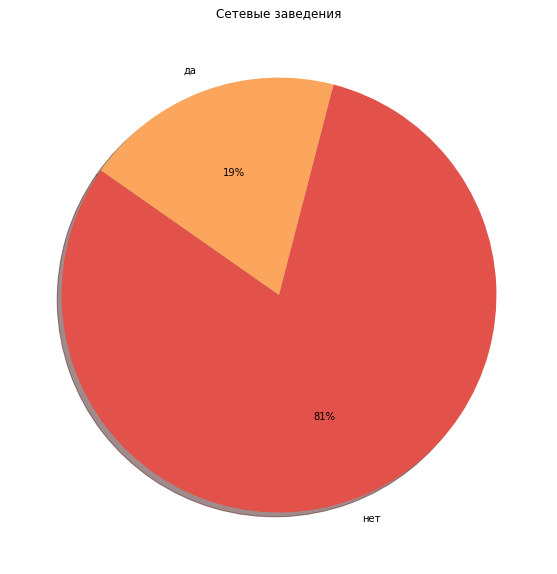

In [8]:
chain_types = data['chain'].value_counts().rename_axis('chain').reset_index(name='count')

plt.figure(figsize=(15, 10))
plt.pie(chain_types['count'], labels=chain_types['chain'],autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Сетевые заведения')
plt.show()

In [9]:
chain_types

,chain,count
0,нет,12398
1,да,2968


81% заведений в Москве - не сетевые, оставшиеся 19% относятся к какой-либо из сетей.

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [10]:
query_data = data.query('chain == "да"')

In [11]:
query_data_type = query_data.groupby('object_type')['object_name'].count().sort_values()

In [12]:
query_data_type

object_type
столовая                                3
буфет                                  11
бар                                    37
кафетерий                              52
закусочная                             56
магазин (отдел кулинарии)              78
ресторан                              544
предприятие быстрого обслуживания     791
кафе                                 1396
Name: object_name, dtype: int64

Больше всего сетевых заведений среди кафе (1396), предприятий быстрого обслуживания (791) и ресторанов (544). Для других типов количество составляет меньше 100.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
chain_data = pd.pivot_table(query_data, index=['number'], values=['id'], aggfunc=['count']).reset_index()
chain_data.columns = ['number', 'count']
chain_data = chain_data.sort_values(by='count', ascending=False)

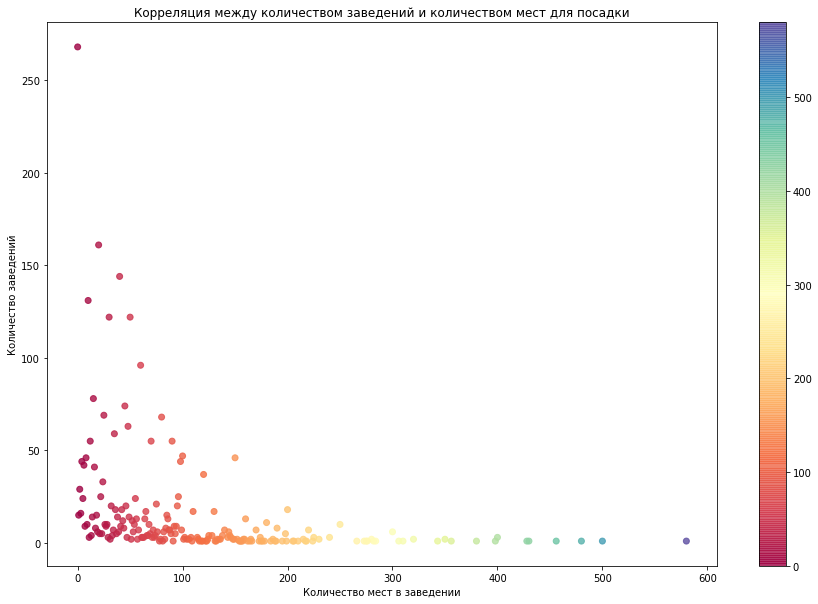

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(chain_data['number'], chain_data['count'], alpha = .8,  c = chain_data['number'], cmap = 'Spectral')
cbar = plt.colorbar()
plt.xlabel('Количество мест в заведении')
plt.ylabel('Количество заведений')
plt.title('Корреляция между количеством заведений и количеством мест для посадки')
plt.show()

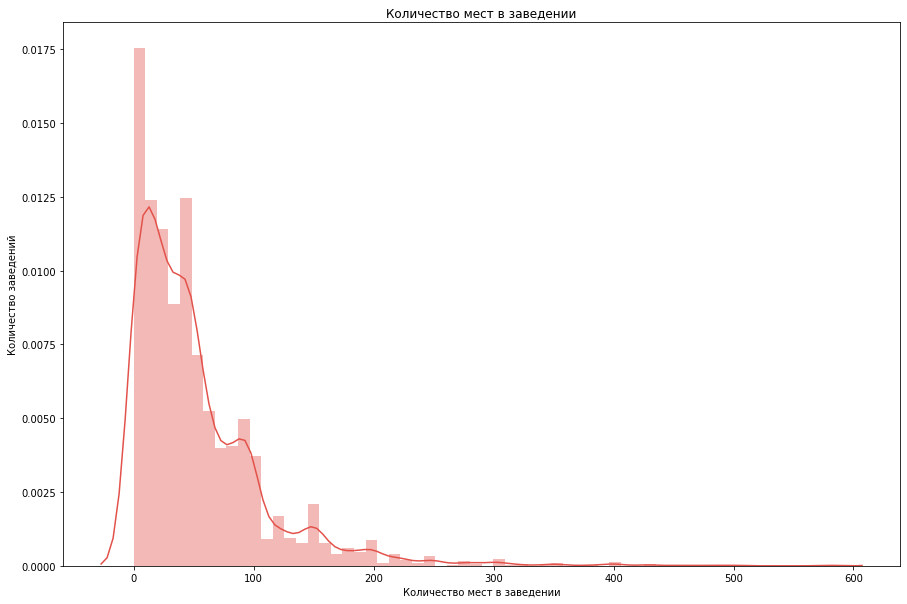

In [15]:
plt.figure(figsize=(15, 10))
sns.distplot(query_data['number'], bins=60)
plt.xlabel('Количество мест в заведении')
plt.ylabel('Количество заведений')
plt.title('Количество мест в заведении')
plt.show()

In [16]:
query_data['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Для сетевых заведений характерно наличие большого количества заведений с небольшим количеством посадочных мест (до 72).

### Среднее количество посадочных мест для каждого вида объекта общественного питания.

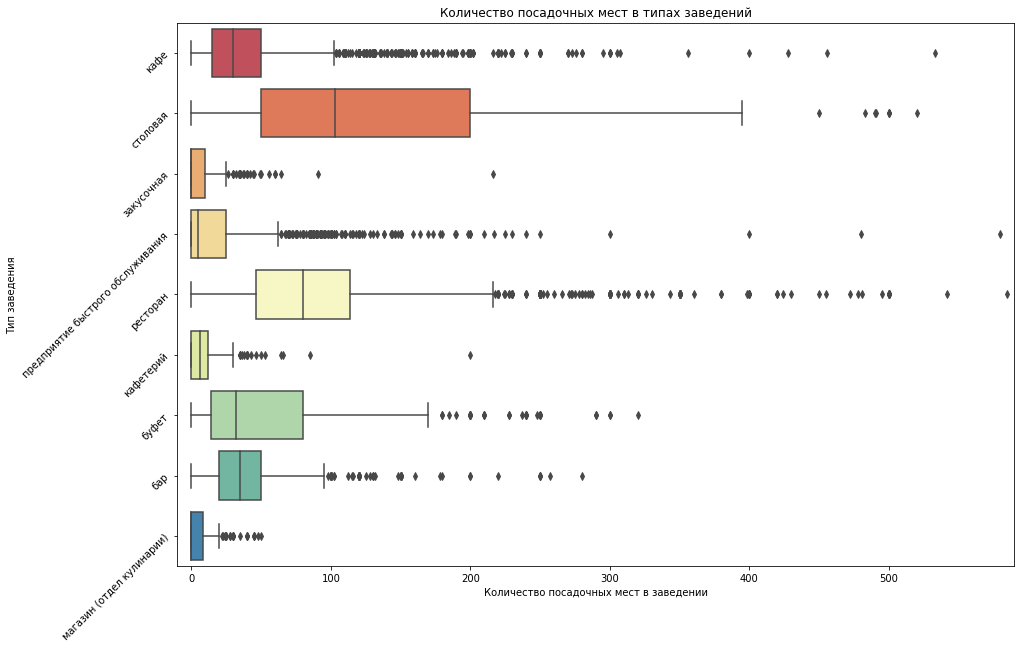

In [17]:

plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='number', y='object_type', data=data, palette = 'Spectral')
ax.set_xlim(-10,590)
plt.yticks(rotation=45)
plt.xlabel('Количество посадочных мест в заведении')
plt.ylabel('Тип заведения')
plt.title('Количество посадочных мест в типах заведений')
plt.show()

In [18]:
data.groupby('object_type')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
предприятие быстрого обслуживания,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0


Среднее количество посадочных мест в столовой составляет 130 мест, в ресторане - 96 мест, в буфете - 51, в баре - 43.

### Выделение в отдельный столбец информации об улице из столбца address .

In [19]:
list1 = (['город Московский','поселение "Мосрентген"','поселение Московский','поселение Михайлово-Ярцевское',
        'поселение Марушкинское','город Троицк','поселение Сосенское','город Зеленоград'])
def get_street(row):
    if row['address'].split(",")[0].strip() == 'город Москва' and row['address'].split(",")[1].strip() not in list1:
        return row['address'].split(",")[1].strip()
    elif row['address'].split(",")[1].strip() in list1:
        return row['address'].split(",")[2].strip()
    else:
        return row['address'].split(",")[0].strip()
data['street'] = data.apply(get_street,axis=1)

In [20]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


### Топ-10 улиц по количеству объектов общественного питания (районы).

In [21]:
street_data_max = pd.pivot_table(data, index=['street'], values=['id'], aggfunc=['count']).reset_index()
street_data_max.columns = ['street', 'count']
street_data_max = street_data_max.sort_values(by='count', ascending=False)
street_data_top = street_data_max.head(10)
street_data_top

,street,count
1576,проспект Мира,204
1024,Профсоюзная улица,183
700,Ленинградский проспект,173
1007,Пресненская набережная,167
417,Варшавское шоссе,162
703,Ленинский проспект,148
1572,проспект Вернадского,132
691,Кутузовский проспект,114
614,Каширское шоссе,112
621,Кировоградская улица,110


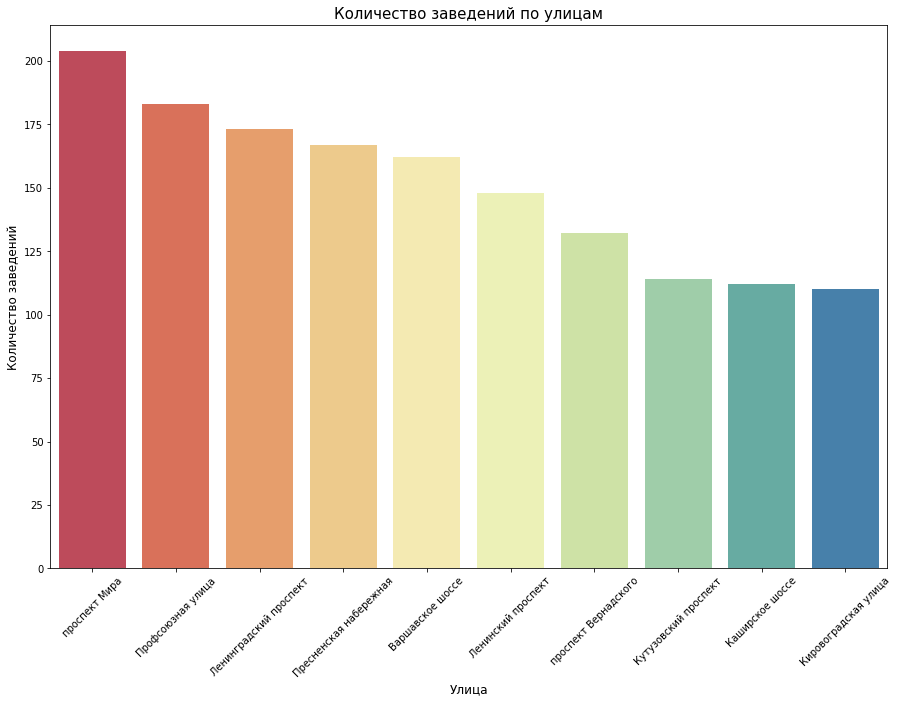

In [22]:
plt.figure(figsize=(15, 10))
plot = sns.barplot(x = street_data_top['street'], y = street_data_top['count'], data=street_data_top, palette = 'Spectral')
plt.xticks(rotation=45)
plt.title('Количество заведений по улицам', fontsize=15)
plt.xlabel('Улица', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.show()

In [23]:
adress = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')

In [24]:
adress.columns = ['street', 'areaid', 'okrug', 'area']

In [25]:
street_data_top_area = street_data_top.merge(adress, on = 'street', how = 'inner')
street_data_top_area = street_data_top_area.drop(['count', 'areaid', 'okrug'], 1)

In [26]:
street_data_top_area['area'].unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

In [27]:
street_data_top_area = street_data_top_area.groupby(street_data_top_area.columns.drop('area').tolist(), as_index=False).agg(list)

In [28]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 200
display(street_data_top_area)

,street,area
0,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
1,Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
2,Кировоградская улица,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
3,Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
4,Ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
5,Ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
6,Пресненская набережная,[Пресненский район]
7,Профсоюзная улица,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
8,проспект Вернадского,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"
9,проспект Мира,"[Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район]"


Улицы в Москве с наибольшим количеством заведений общественного питания: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

### Улицы с одним объектом общественного питания (районы).

In [29]:
street_data_min = street_data_max.sort_values(by='count', ascending=True)
street_data_min = street_data_min.query('count == "1"')
street_data_min

,street,count
1017,Прокатная улица,1
1936,улица Ремизова,1
193,4-й Вятский переулок,1
1799,улица Кутузова,1
194,4-й Кожевнический переулок,1
...,...,...
1123,Соймоновский проезд,1
1099,Сивашская улица,1
1098,Сибирский проезд,1
1097,Сеченовский переулок,1


In [30]:
street_data_min = street_data_min.merge(adress, on = 'street', how = 'left')
street_data_min = street_data_min.drop(['count', 'areaid', 'okrug'], 1)

In [31]:
street_data_min['area'].unique()

array(['Район Ивановское', 'Район Котловка', 'Савеловский район',
       'Можайский Район', 'Даниловский район', 'Донской район',
       'Район Щукино', 'Район Печатники', 'Южнопортовый Район',
       'Район Беговой', 'Район Богородское', 'Нижегородский район',
       'Район Аэропорт', 'Район Ясенево', 'Рязанский район',
       'Район Марьина роща', 'Район Митино', nan, 'Район Текстильщики',
       'Район Восточное Измайлово', 'Ярославский Район',
       'Бабушкинский район', 'Район Москворечье-Сабурово',
       'Район Хамовники', 'Район Измайлово', 'Район Северное Измайлово',
       'Район Замоскворечье', 'Алексеевский район', 'Район Лефортово',
       'Район Хорошево-Мневники', 'Басманный район',
       'Район Ново-Переделкино', 'Район Лианозово', 'Район Сокольники',
       'Тимирязевский Район', 'Район Северный', 'Район Дорогомилово',
       'Район Косино-Ухтомский', 'Лосиноостровский район',
       'Мещанский район', 'Район Южное Бутово', 'Тверской район',
       'Район Кунцево', '

In [32]:
street_data_min = street_data_min.groupby(street_data_min.columns.drop('area').tolist(), as_index=False).agg(list)

In [33]:
display(street_data_min)

,street,area
0,1-й Балтийский переулок,[Район Аэропорт]
1,1-й Басманный переулок,"[Басманный район, Красносельский район]"
2,1-й Ботанический проезд,[Район Свиблово]
3,1-й Вешняковский проезд,[Рязанский район]
4,1-й Голутвинский переулок,[Район Якиманка]
...,...,...
651,улица Шеногина,[Район Хорошево-Мневники]
652,улица Шумилова,[Район Кузьминки]
653,улица Шумкина,[Район Сокольники]
654,улица Щорса,[Район Солнцево]


In [34]:
street_data_top_area = street_data_top_area.groupby(street_data_top_area.columns.drop('area').tolist(), as_index=False).agg(list)

В Москве есть 656 улиц, на которых расположено всего по 1 объекту общественного питания, но это может говорить не только о том, что улица недостаточно популярна для того, чтобы на ней было много кафе или подобных заведений - например, эта улица может быть короткой по своей протяженности (и, соответственно, расположена только в одном районе).

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [35]:
seat_data = street_data_top.merge(data, on = 'street', how = 'inner')

In [36]:
seat_data['number'].describe()

count    1505.000000
mean       58.019269
std        90.030692
min         0.000000
25%        12.000000
50%        39.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

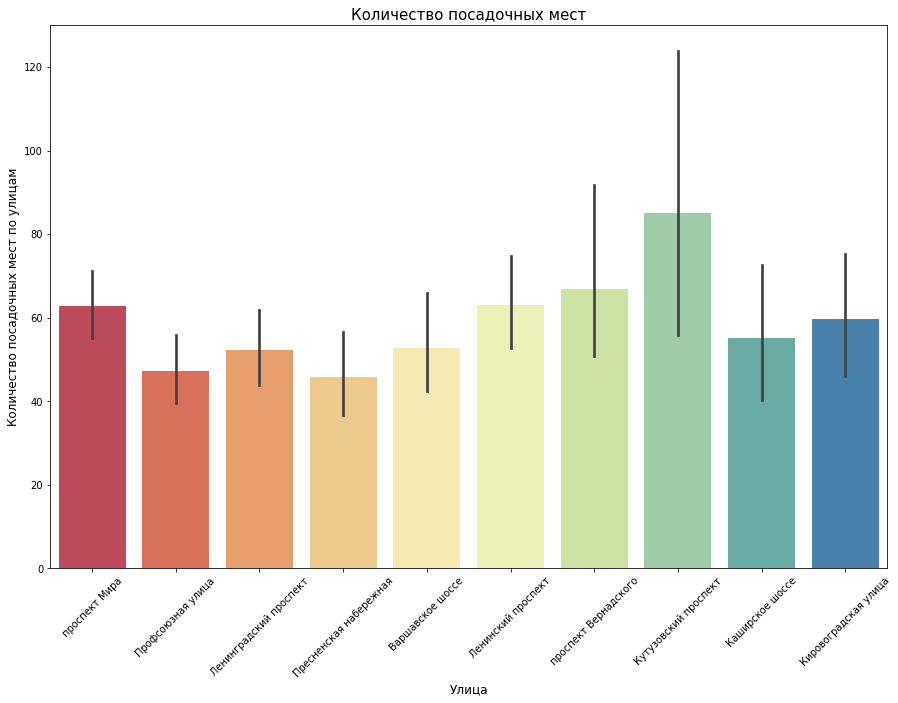

In [37]:
plt.figure(figsize=(15, 10))
plot = sns.barplot(x = seat_data['street'], y = seat_data['number'], data=seat_data, palette = 'Spectral')
plt.xticks(rotation=45)
plt.title('Количество посадочных мест', fontsize=15)
plt.xlabel('Улица', fontsize=12)
plt.ylabel('Количество посадочных мест по улицам', fontsize=12)
plt.show()

In [38]:
seat_data2 = pd.pivot_table(seat_data, index=['number'], values=['id'], aggfunc=['count']).reset_index()
seat_data2.columns = ['number', 'count']
seat_data2 = seat_data2.sort_values(by='count', ascending=False)

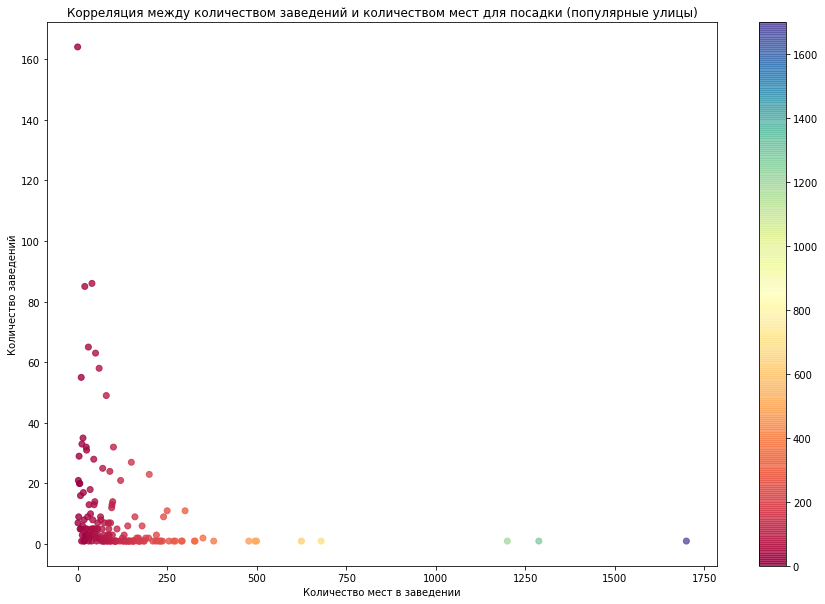

In [39]:
plt.figure(figsize=(15, 10))
plt.scatter(seat_data2['number'], seat_data2['count'], alpha = .8,  c = seat_data2['number'], cmap = 'Spectral')
cbar = plt.colorbar()
plt.xlabel('Количество мест в заведении')
plt.ylabel('Количество заведений')
plt.title('Корреляция между количеством заведений и количеством мест для посадки (популярные улицы)')
plt.show()

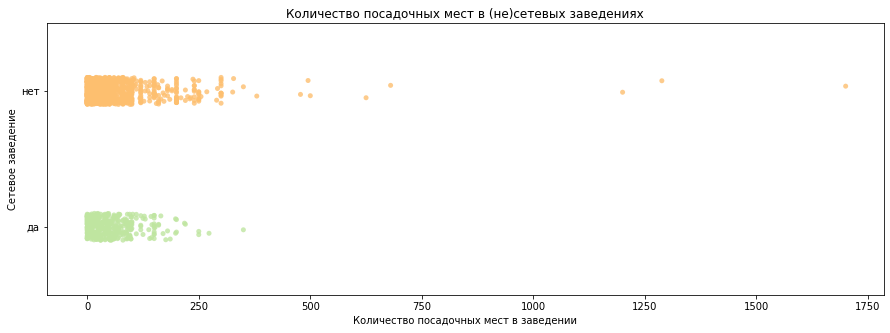

In [40]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='number', y='chain', data=seat_data, alpha = .8, palette = 'Spectral') 
plt.xlabel('Количество посадочных мест в заведении')
plt.ylabel('Сетевое заведение')
plt.title('Количество посадочных мест в (не)сетевых заведениях')
plt.show()

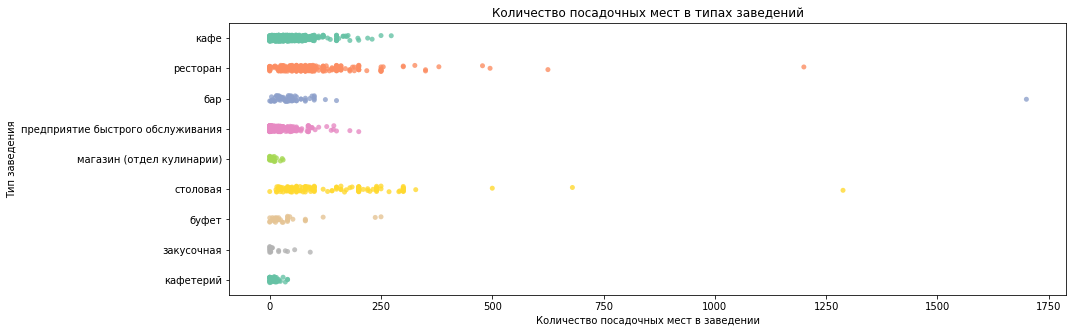

In [41]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='number', y='object_type', data=seat_data, alpha = .8, palette = 'Set2')
plt.xlabel('Количество посадочных мест в заведении')
plt.ylabel('Тип заведения')
plt.title('Количество посадочных мест в типах заведений')
plt.show()

Больше всего на популярных улицах - кафе, столовых и ресторанов с количеством посадочных мест около 50, причем эти заведения, как правило, не относятся ни к какой из сетей. Заведения, расположенные на этих улицах, в основном имеют от 20 до 100 мест.

## Выводы

Решено открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Было подготовлено исследование рынка для инвесторов с использованием открытых данных о заведениях общественного питания в Москве.

После анализа текущего рынка заведений общественного питания в Москве можно сделать несколько выводов относительно полученных данных:
- Самыми популярными заведениями в Москве являются кафе (40%), столовые (17%), рестораны (15%), заведения быстрого обслуживания (13%). 
- Больше всего сетевых заведений среди кафе (1396), предприятий быстрого обслуживания (791) и ресторанов (544). Для других типов количество составляет меньше 100.
- Для сетевых заведений характерно наличие большого количества заведений с небольшим количеством посадочных мест (до 72). 
- Среднее количество посадочных мест в столовой составляет 130 мест, в ресторане - 96 мест, в буфете - 51, в баре - 43.
- Улицы в Москве с наибольшим количеством заведений общественного питания: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. Заведения, расположенные на этих улицах, в основном имеют от 20 до 100 мест.

Подводя итог, я считаю, что наиболее прибыльным было бы открытие небольшого кафе или бара на 40 мест на Пресненской набережной - в районе Москва-Сити, так как эта локация входит в топ-10 по большому количеству расположенных там заведений питания, кроме того, такой выбор обусловлен большой проходимостью, а еще там большая концентрация айтистов, которым должно быть по вкусу такое новшество.

## Презентация

Ссылка на презентацию

https://drive.google.com/file/d/11_ctmjPe8_6rlvQXcaEn_AbxomgQAVNf/view